___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

from scipy.stats import zscore
from scipy import stats
from numpy import percentile


from sklearn.utils import class_weight, compute_class_weight
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, auc, make_scorer, silhouette_samples, silhouette_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

import plotly.express as px
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import plot, iplot
from datetime import datetime
import datetime as dt
from turtle import color

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
def outlier_zscore(df, col, min_z=1, max_z=5, step=0.05, print_list=False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []

    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append(
            (threshold, len(np.where(z_scores > threshold)[0])))

    df_outlier = pd.DataFrame(threshold_list, columns=[
                              'threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count -
                         df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(
        lambda x: x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0], 2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean(
    ) + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(
        df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(),
               colors="r", ls=":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                                                    IQR_coef,
                                                                                                    outlier_limit,
                                                                                                    num_outlier,
                                                                                                    (np.round(percentile_threshold, 3),
                                                                                                     np.round(100-percentile_threshold, 3))),
                 (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

def outlier_inspect(df, col, min_z=1, max_z=5, step=0.05, max_hist=None, bins=50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1, 3, 1)
    if max_hist == None:
        sns.distplot(df[col], kde=True, bins=50)
    else:
        sns.distplot(df[df[col] <= max_hist][col], kde=False, bins=50)
    plt.subplot(1, 3, 2)
    sns.boxplot(df[col])
    plt.subplot(1, 3, 3)
    z_score_inspect = outlier_zscore(
        df, col, min_z=min_z, max_z=max_z, step=step)
    plt.show()


def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [3]:
df0 = pd.read_csv("creditcard.csv")

In [4]:
df = df0.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [6]:
#pip install deepchecks

In [7]:
import sys
from deepchecks.tabular import datasets
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity

deepchecks - WARNING - You are using deepchecks version 0.9.1, however a newer version is available.Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


In [8]:
data = datasets.regression.avocado.load_data(
    data_format='DataFrame', as_train_test=False)

In [9]:
ds = Dataset(df, cat_features=[],
             datetime_name='Time', label='Class')

In [10]:
# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Data Integrity Suite: 
 
 
 
 12/12 [Time: 00:53, Check=Identifier Label Correlation]

deepchecks - WARNING - Due to the small number of unique labels task type was inferred as multiclass in spite of the label column is of type integer. Initialize your Dataset with either label_type="multiclass" or label_type="regression" to resolve this warning.


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_0FEE6LI8HCLZCI5QKJJKYNDCZ">Data I…

### Exploratory Data Analysis

In [11]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [12]:
df.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
df.shape

(284807, 31)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [16]:
df.isnull().sum().any()

False

There are no missing values

In [17]:
df.duplicated().sum()

1081

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
df[df['Class'] == 0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [20]:
df[df['Class'] == 1].describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


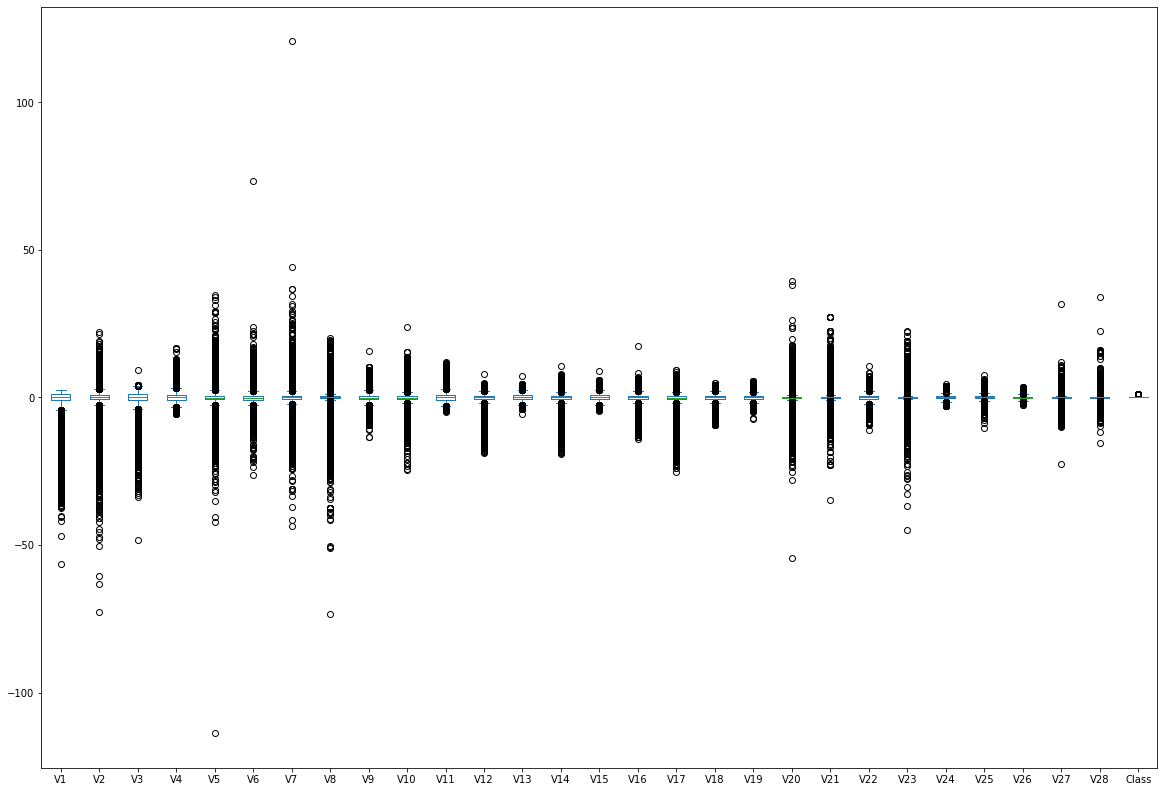

In [21]:
df.drop(columns=['Time', 'Amount'], axis=1).plot(kind='box', figsize=(20,14));

<AxesSubplot:>

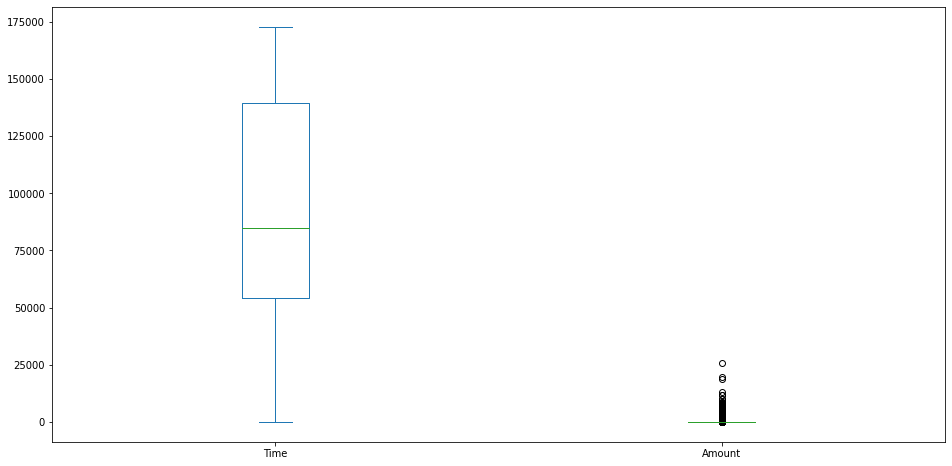

In [22]:
df[['Time', 'Amount']].plot(kind='box', figsize=(16,8))

In [23]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels,
                         show_hist=False, show_rug=False)
fig['layout'].update(
    title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')


In [24]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

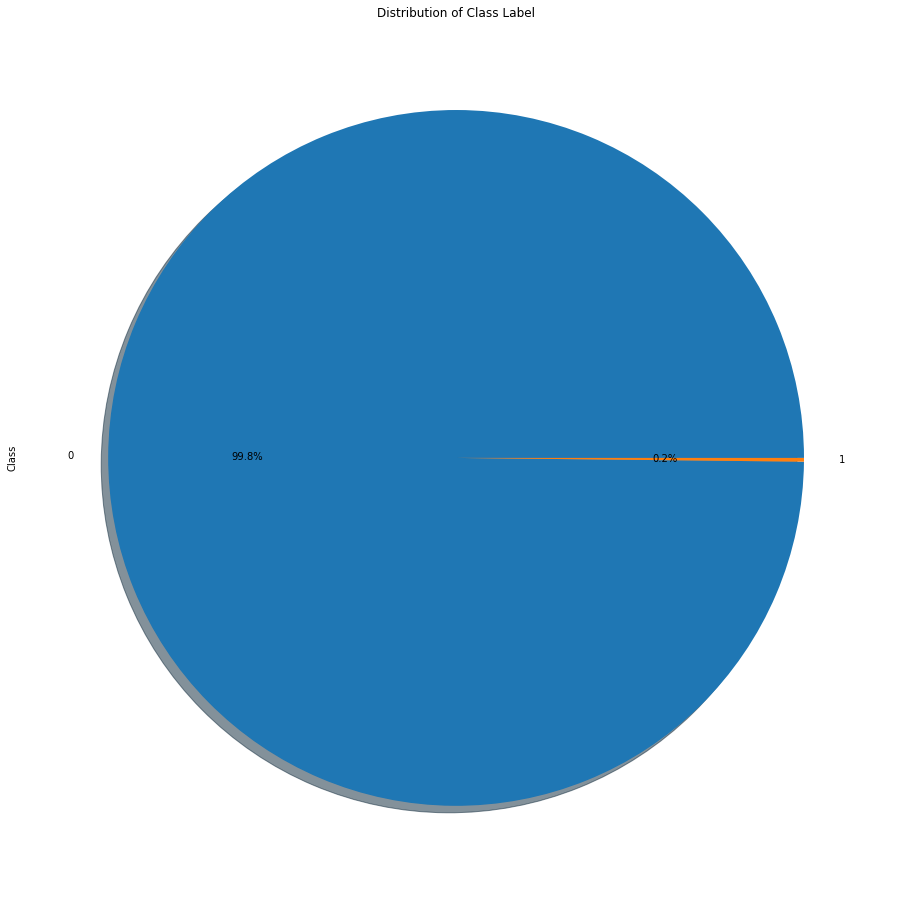

In [25]:
df.Class.value_counts().plot(kind='pie', figsize=(16,16), autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Distribution of Class Label')
plt.show()

In [26]:
print('Percentage of Class-1: %', round(df['Class'].value_counts(normalize=True)[1]*100,2))
print('------------------------------')
print('Percentage of Class-0: %', round(df['Class'].value_counts(normalize=True)[0]*100,2))

Percentage of Class-1: % 0.17
------------------------------
Percentage of Class-0: % 99.83


It seems that the data is very unbalanced.

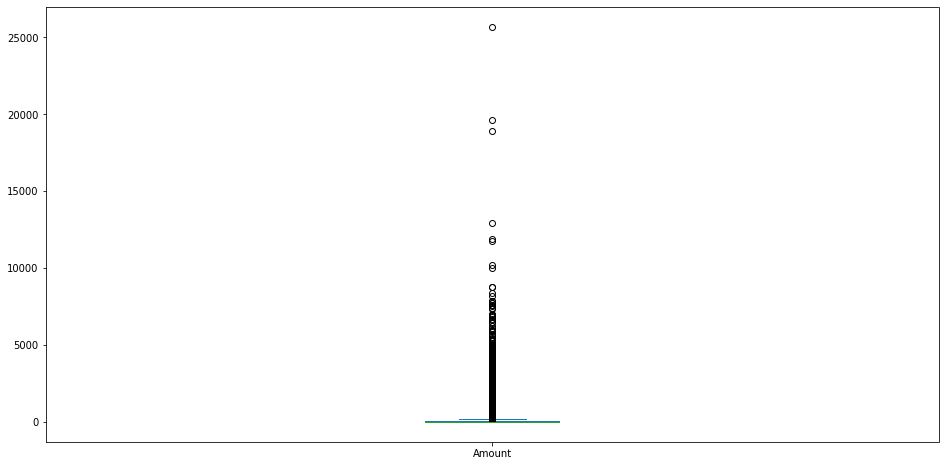

In [27]:
df.Amount.plot(kind='box', figsize=(16,8));

In [28]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

There is a gap between 75% and the maximum value in the Amount column. In addition, the standard deviation is much larger than the mean value. There seems to be a possibility of an outlier. Boxplot supports this too.

In [29]:
df.Amount.value_counts().sort_values(ascending=False)

1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
694.81        1
393.55        1
902.00        1
283.40        1
95.63         1
Name: Amount, Length: 32767, dtype: int64

plt.figure(figsize=(20, 9))
sns.histplot(data=df, x='Amount', kde=True, hue='Class')
plt.show()

In [8]:
def quar(x):
    if x <= 5.6:
        return 'Q1'
    elif 5.6 < x <= 22.0:
        return 'Q2'
    elif 22.0 < x <= 77.165:
        return 'Q3'
    else:
        return 'Q4'


In [9]:
df['Amount_Classes'] = df['Amount'].apply(quar)
df.Amount_Classes.value_counts()

Q2    71402
Q1    71241
Q4    71202
Q3    70962
Name: Amount_Classes, dtype: int64

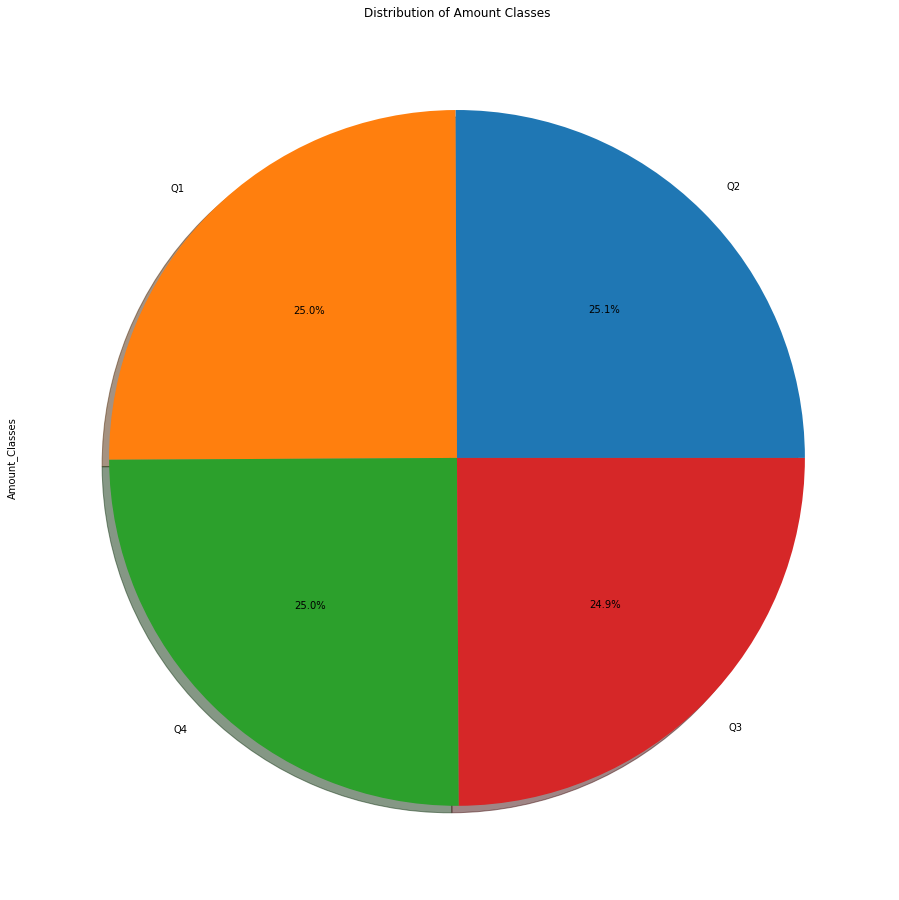

In [32]:
df.Amount_Classes.value_counts().plot(kind='pie', figsize=(
    16, 16), autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Distribution of Amount Classes')
plt.show()

In [33]:
df[df['Class'] == 0]['Amount_Classes'].value_counts()


Q2    71355
Q4    71028
Q1    71017
Q3    70915
Name: Amount_Classes, dtype: int64

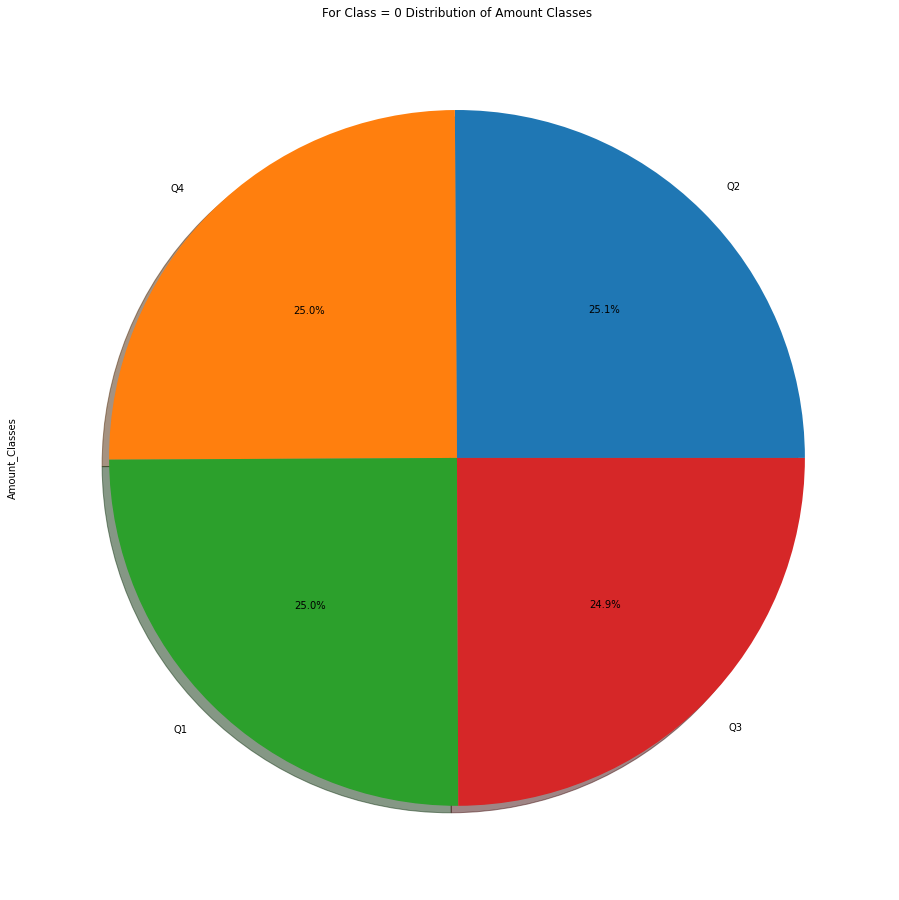

In [34]:
df[df['Class'] == 0]['Amount_Classes'].value_counts().plot(kind='pie', figsize=(
    16, 16), autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('For Class = 0 Distribution of Amount Classes')
plt.show()


In [35]:
df[df['Class'] == 1]['Amount_Classes'].value_counts()


Q1    224
Q4    174
Q3     47
Q2     47
Name: Amount_Classes, dtype: int64

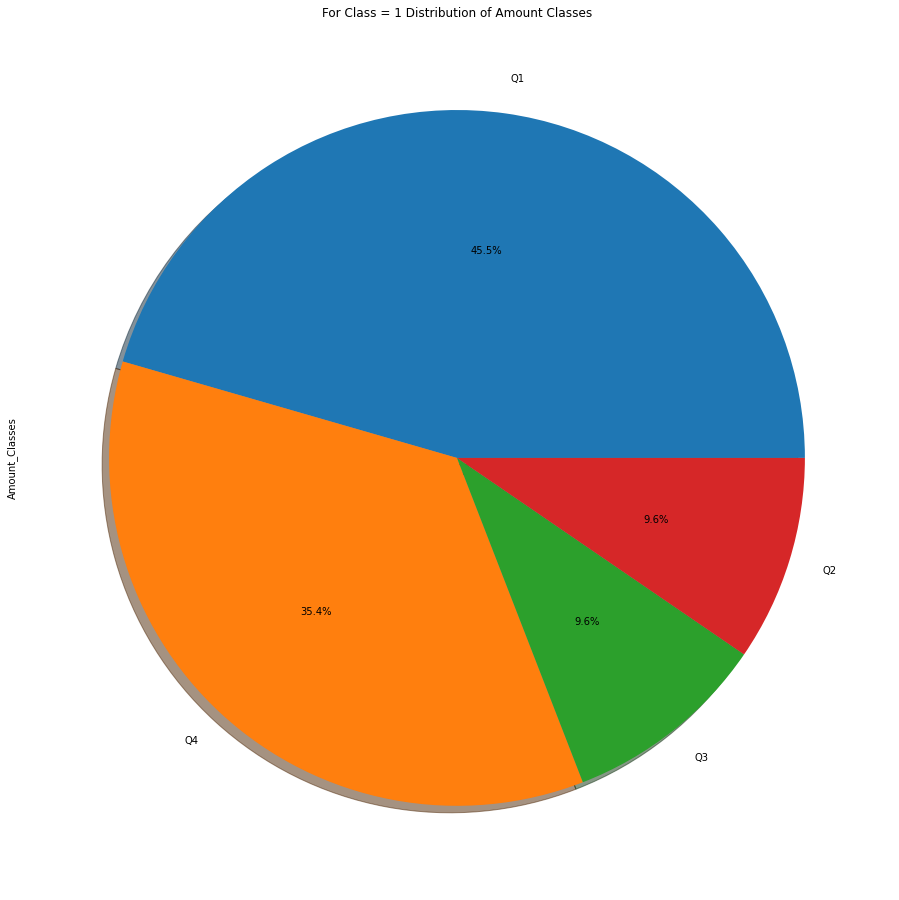

In [36]:
df[df['Class'] == 1]['Amount_Classes'].value_counts().plot(kind='pie', figsize=(
    16, 16), autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('For Class = 1 Distribution of Amount Classes')
plt.show()


In [37]:
print('--------------------------------------------------------')
print('Number of fraudulent transactions for Q1      : ', df[(df['Class']==1) & (df['Amount_Classes'] == 'Q1')]['Class'].sum())
print('Total amount of fraudulent transactions for Q1: ', df[(df['Class']==1) & (df['Amount_Classes'] == 'Q1')]['Amount'].sum())
print('--------------------------------------------------------')
print('Number of fraudulent transactions for Q2      : ',df[(df['Class'] == 1) & (df['Amount_Classes'] == 'Q2')]['Class'].sum())
print('Total amount of fraudulent transactions for Q2: ',df[(df['Class'] == 1) & (df['Amount_Classes'] == 'Q2')]['Amount'].sum())
print('--------------------------------------------------------')
print('Number of fraudulent transactions for Q3      : ',df[(df['Class'] == 1) & (df['Amount_Classes'] == 'Q3')]['Class'].sum())
print('Total amount of fraudulent transactions for Q3: ',df[(df['Class'] == 1) & (df['Amount_Classes'] == 'Q3')]['Amount'].sum())
print('--------------------------------------------------------')
print('Number of fraudulent transactions for Q4      : ',df[(df['Class'] == 1) & (df['Amount_Classes'] == 'Q4')]['Class'].sum())
print('Total amount of fraudulent transactions for Q4: ',df[(df['Class'] == 1) & (df['Amount_Classes'] == 'Q4')]['Amount'].sum())
print('--------------------------------------------------------')


--------------------------------------------------------
Number of fraudulent transactions for Q1      :  224
Total amount of fraudulent transactions for Q1:  261.32
--------------------------------------------------------
Number of fraudulent transactions for Q2      :  47
Total amount of fraudulent transactions for Q2:  547.02
--------------------------------------------------------
Number of fraudulent transactions for Q3      :  47
Total amount of fraudulent transactions for Q3:  2006.31
--------------------------------------------------------
Number of fraudulent transactions for Q4      :  174
Total amount of fraudulent transactions for Q4:  57313.32
--------------------------------------------------------


In [38]:
df[df['Class'] == 1].groupby('Amount_Classes')['Amount'].sum()


Amount_Classes
Q1      261.32
Q2      547.02
Q3     2006.31
Q4    57313.32
Name: Amount, dtype: float64

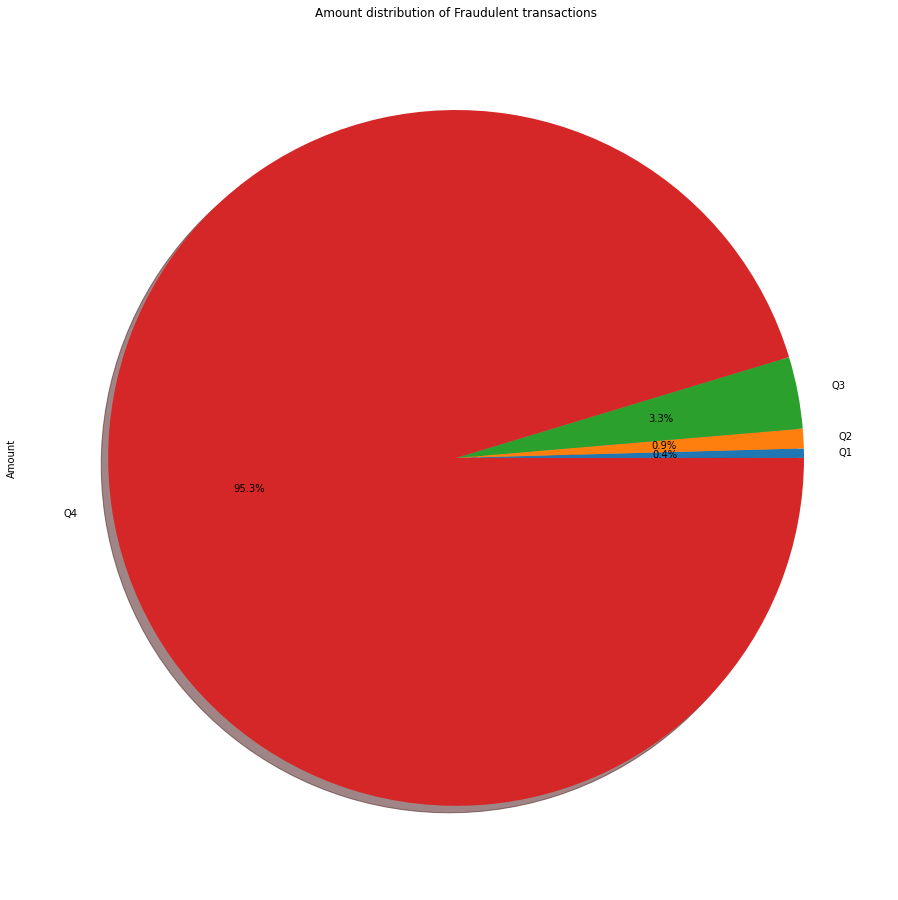

In [39]:
df[df['Class'] == 1].groupby('Amount_Classes')['Amount'].sum().plot(kind='pie', figsize=(
    16, 16), autopct='%1.1f%%', shadow=True, startangle=0)
plt.title(
    'Amount distribution of Fraudulent transactions')
plt.show()


As seen above, there are fraudulent transactions in every quarter.
Q-1 has the highest number of transactions with 224 transactions.
Q-4 has the highest amount with 57313.32 amount.

In [40]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels,
                         show_hist=False, show_rug=False)
fig['layout'].update(
    title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')


plt.figure(figsize=(20, 17))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()

In [41]:
def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'


pd.DataFrame(df).corr().style.applymap(color_red)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


There is no multicollinearity problem among the features.

### Data Cleaning
Check Missing Values and Outliers

In [42]:
df.isnull().sum().any()

False

In [43]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()
           * 100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


,Time,V1,Class,Amount,V28,V27,V26,V25,V24,V23,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Amount_Classes
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


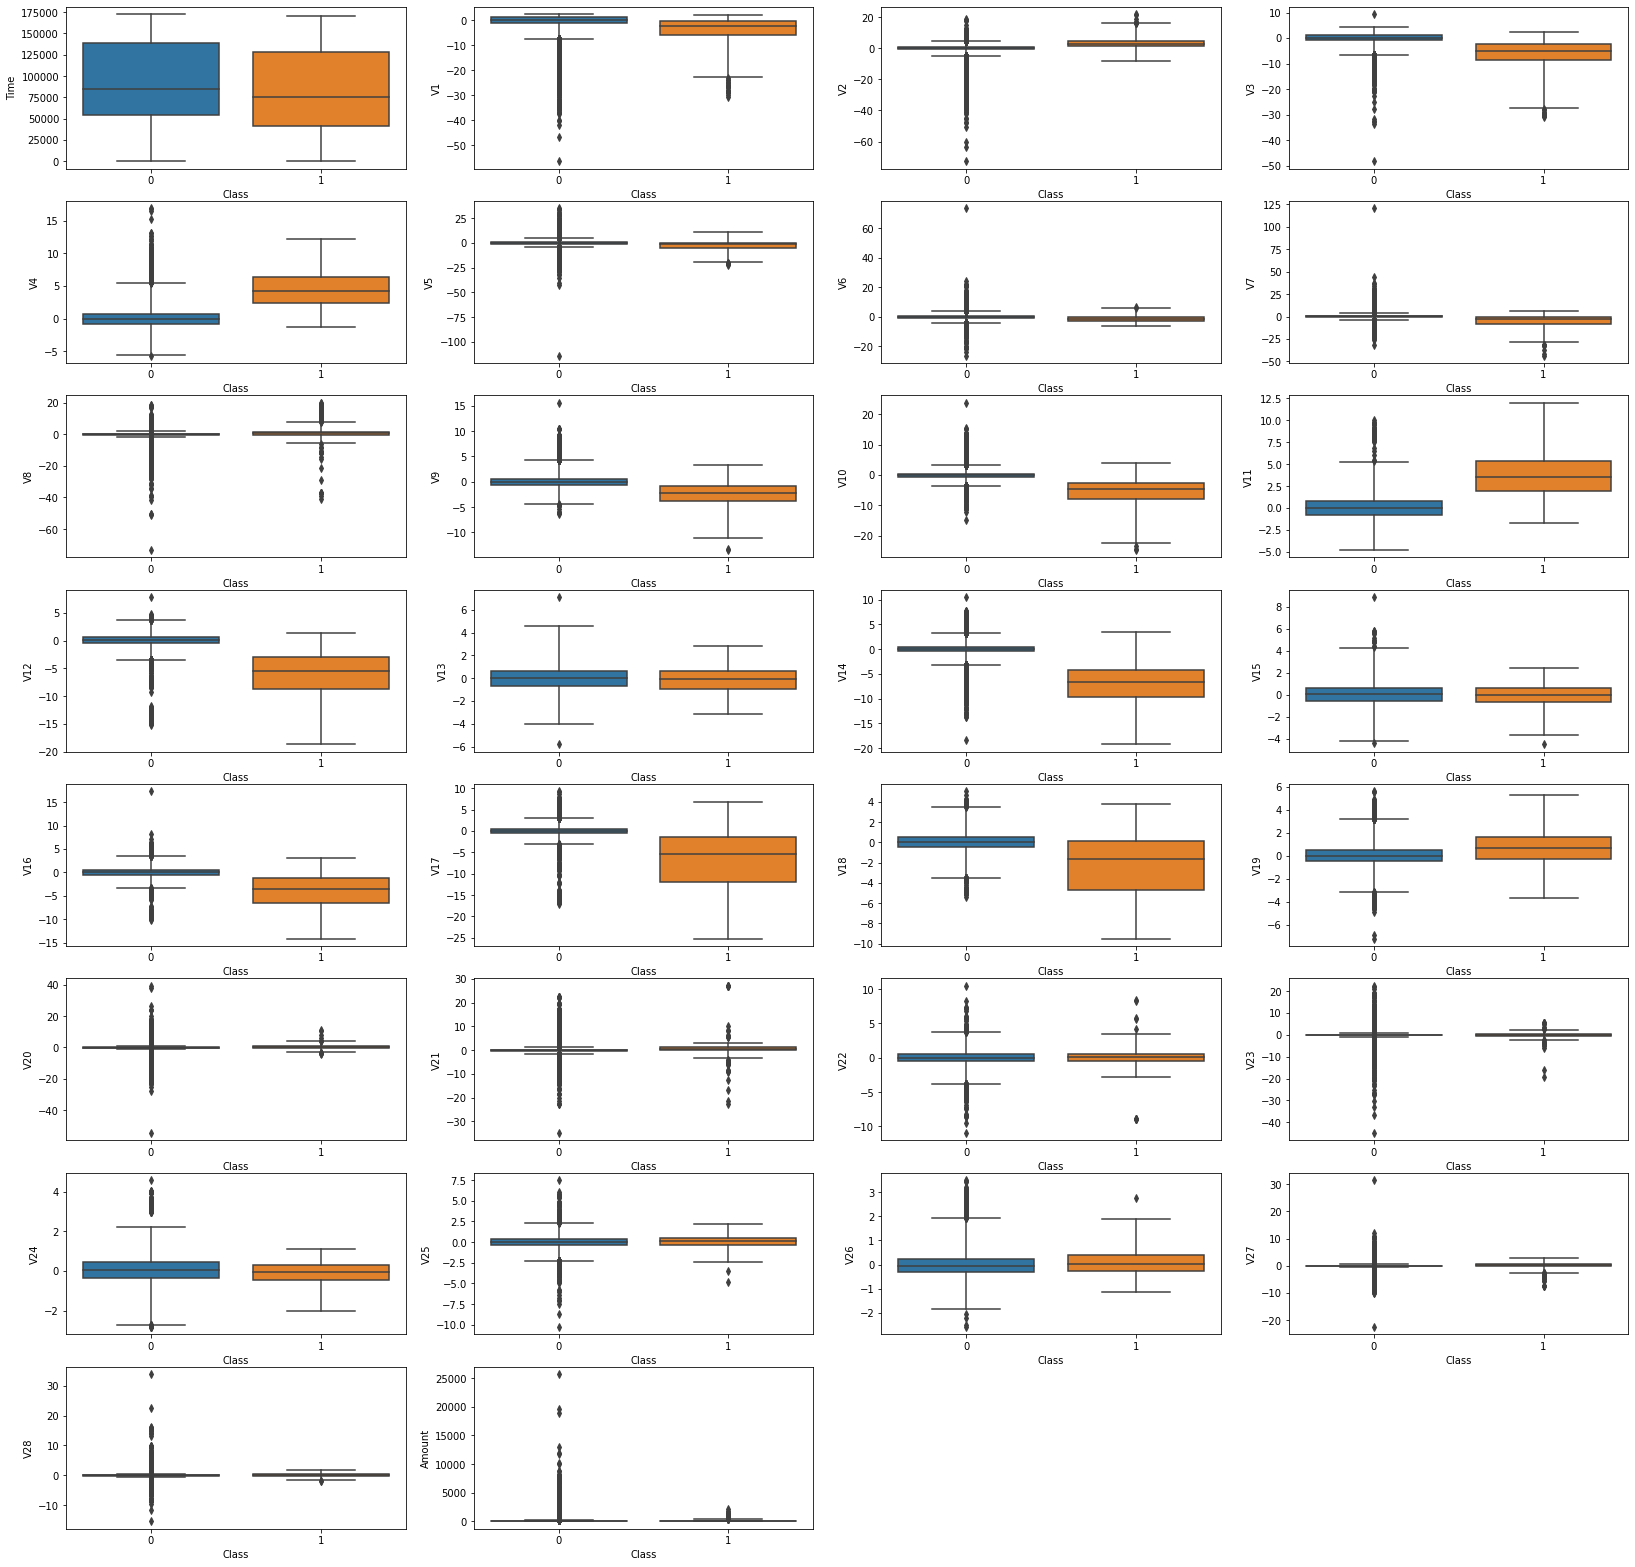

In [44]:
index = 0
plt.figure(figsize=(28, 28))
for feature in df.columns[:30]:
    index += 1
    plt.subplot(8, 4, index)
    sns.boxplot(y=feature, x="Class", data=df, whis=3)
plt.show()

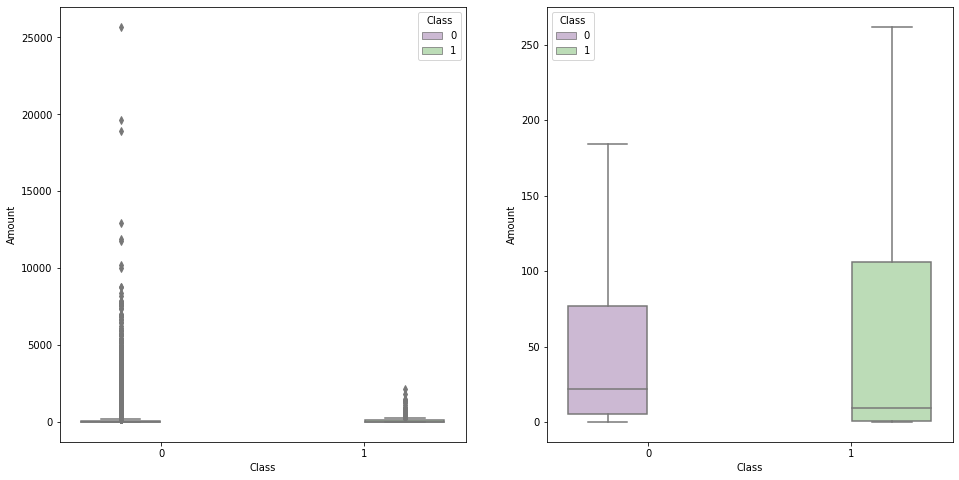

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
s = sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class",
                data=df, palette="PRGn", showfliers=True)
s = sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class",
                data=df, palette="PRGn", showfliers=False)
plt.show()


for col in df.columns[:30]:
    outlier_inspect(df, col)


---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Classes
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Q4
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Q1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Q4
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Q4
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Q3


In [11]:
df1 = df.drop('Amount_Classes', axis=1)

In [48]:
X = df1.drop(columns=['Class'], axis=1)
y = df1['Class']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=101)


In [50]:
X_train.shape

(227845, 30)

In [51]:
y_train.shape

(227845,)

In [52]:
X_test.shape

(56962, 30)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [53]:
train_ds = Dataset(X_train, cat_features=[])
test_ds = Dataset(X_test, cat_features=[])


In [54]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
#suite_result = validation_suite.run(train_ds, test_ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
#suite_result


#### Scaling

In [55]:
scaler = MinMaxScaler()

X_train["Amount"] = scaler.fit_transform(X_train["Amount"].values.reshape(-1,1))
X_train["Time"] = scaler.fit_transform(X_train["Time"].values.reshape(-1,1))

X_test["Amount"] = scaler.fit_transform(X_test["Amount"].values.reshape(-1,1))
X_test["Time"] = scaler.fit_transform(X_test["Time"].values.reshape(-1,1))

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [56]:
from sklearn.model_selection import StratifiedKFold, KFold


In [57]:
print('Class Ratio:',sum(df1['Class'])/len(df1['Class']))

Class Ratio: 0.001727485630620034


***ii. Model Training***

In [58]:
log_model = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=101)


In [59]:
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=101)

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [60]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[55423  1441]
 [    7    91]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


Train_Set
[[221869   5582]
 [    32    362]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.92      0.11       394

    accuracy                           0.98    227845
   macro avg       0.53      0.95      0.55    227845
weighted avg       1.00      0.98      0.99    227845



In [61]:
kfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)

In [62]:
scoring = {"precision_fraud": make_scorer(precision_score, labels=1),
           "recall_fraud": make_scorer(recall_score, labels=1),
           "f1_fraud": make_scorer(f1_score, labels=1)}

In [63]:
model = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=101)

scores = cross_validate(model, X_train, y_train,
                         scoring=scoring, cv=kfold, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_precision_fraud     0.059284
train_precision_fraud    0.060412
test_recall_fraud        0.903718
train_recall_fraud       0.920475
test_f1_fraud            0.111234
train_f1_fraud           0.113373
dtype: float64

GridSearchCV

In [64]:
recall_fraud = make_scorer(recall_score, average=None, labels=1)


In [65]:
log_grid = LogisticRegression(class_weight='balanced', random_state=101)


In [66]:
log_grid.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 101,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [67]:
param_grid = {"class_weight": ["balanced", None],
              'penalty': ["l1", "l2"],
              'solver': ['saga', 'lbfgs'],
              }

In [68]:
log_grid_model = GridSearchCV(
    log_grid, param_grid, scoring=recall_fraud, verbose=2, n_jobs=-1)


In [69]:
log_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          random_state=101),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['saga', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=1),
             verbose=2)

In [70]:
log_grid_model.best_estimator_


LogisticRegression(class_weight='balanced', penalty='l1', random_state=101,
                   solver='saga')

In [71]:
log_tuned = LogisticRegression(class_weight='balanced',
                               penalty='l1',
                               solver='saga',
                               random_state=101)

In [72]:
log_tuned.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty='l1', random_state=101,
                   solver='saga')

In [73]:
eval_metric(log_tuned, X_train, y_train, X_test, y_test)

Test_Set
[[55394  1470]
 [    7    91]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


Train_Set
[[221708   5743]
 [    31    363]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.06      0.92      0.11       394

    accuracy                           0.97    227845
   macro avg       0.53      0.95      0.55    227845
weighted avg       1.00      0.97      0.99    227845




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


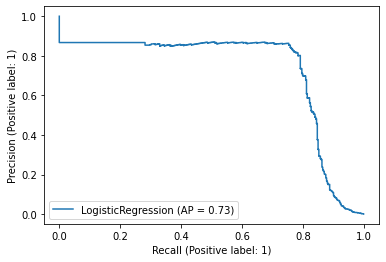

In [74]:
plot_precision_recall_curve(log_tuned, X_train, y_train);


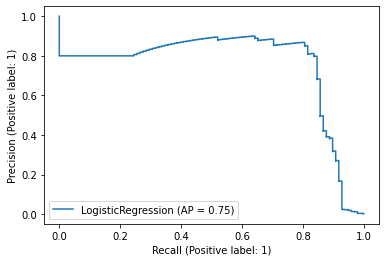

In [75]:
plot_precision_recall_curve(log_tuned, X_test, y_test);


In [76]:
y_train_pred_proba = log_tuned.predict_proba(X_train)
average_precision_score(y_train, y_train_pred_proba[:,1])

0.7300383950827309

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [77]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])


In [78]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, log_tuned)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
#suite_result.show()


Model Evaluation Suite: 
 
 
 
 12/12 [Time: 00:34, Check=Model Inference Time]

deepchecks - WARNING - Due to the small number of unique labels task type was inferred as multiclass in spite of the label column is of type integer. Initialize your Dataset with either label_type="multiclass" or label_type="regression" to resolve this warning.


### Logistic Regression with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

In [79]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


***i. Train-Test Split (Again)***

In [80]:
X = df1.drop(columns=['Class'], axis=1)
y = df1['Class']


In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=101)


***ii. Model Training***

In [82]:
log_w = LogisticRegression(class_weight={0:0.1, 1:0.9}, max_iter=5000, random_state=101)

In [83]:
log_w.fit(X_train, y_train)


LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=5000,
                   random_state=101)

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [84]:
eval_metric(log_w, X_train, y_train, X_test, y_test)


Test_Set
[[56830    34]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227311    140]
 [    85    309]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.69      0.78      0.73       394

    accuracy                           1.00    227845
   macro avg       0.84      0.89      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [85]:
kfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)


In [86]:
model = LogisticRegression(class_weight={0: 0.1, 1: 0.9},
                           max_iter=5000, random_state=101)

scores = cross_validate(model, X_train, y_train,
                        scoring=scoring, cv=kfold, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_precision_fraud     0.589122
train_precision_fraud    0.608229
test_recall_fraud        0.792244
train_recall_fraud       0.784275
test_f1_fraud            0.669035
train_f1_fraud           0.677168
dtype: float64

GridSearchCV

In [87]:
f1_fraud = make_scorer(f1_score, average=None, labels=1)
log_grid_w = LogisticRegression(
    class_weight={0: 0.1, 1: 0.9}, random_state=101)


In [88]:
param_grid = {'penalty': ["l1", "l2"],
              'solver': ['saga', 'lbfgs'],
              }

In [89]:
log_grid_model_w = GridSearchCV(
    log_grid_w, param_grid, scoring=f1_fraud, verbose=2, n_jobs=-1)


In [90]:
log_grid_model_w.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9},
                                          random_state=101),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'], 'solver': ['saga', 'lbfgs']},
             scoring=make_scorer(f1_score, average=None, labels=1), verbose=2)

In [91]:
log_grid_model_w.best_params_

{'penalty': 'l1', 'solver': 'saga'}

Tuned Model

In [92]:
log_tuned_w = LogisticRegression(class_weight={0: 0.1, 1: 0.9},
                               penalty='l1',
                               solver='saga',
                               random_state=101)

In [93]:
log_tuned_w.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, penalty='l1',
                   random_state=101, solver='saga')

In [94]:
eval_metric(log_tuned_w, X_train, y_train, X_test, y_test)

Test_Set
[[56864     0]
 [   98     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227451      0]
 [   394      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.00      0.00      0.00       394

    accuracy                           1.00    227845
   macro avg       0.50      0.50      0.50    227845
weighted avg       1.00      1.00      1.00    227845



In [95]:
eval_metric(log_w, X_train, y_train, X_test, y_test)


Test_Set
[[56830    34]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227311    140]
 [    85    309]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.69      0.78      0.73       394

    accuracy                           1.00    227845
   macro avg       0.84      0.89      0.87    227845
weighted avg       1.00      1.00      1.00    227845



***iv.  Plot Precision and Recall Curve***


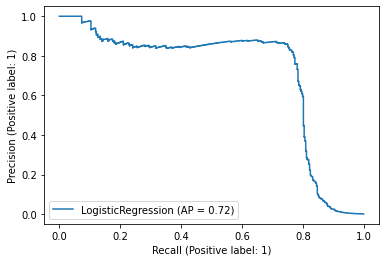

In [96]:
plot_precision_recall_curve(log_w, X_train, y_train);


Prediction

In [97]:
y_pred = log_w.predict(X_test)
y_train_pred = log_w.predict(X_train)

LOG_tuned_f1 = f1_score(y_test, y_pred)
LOG_tuned_acc = accuracy_score(y_test, y_pred)
LOG_tuned_recall = recall_score(y_test, y_pred)
LOG_tuned_auc = roc_auc_score(y_test, y_pred)


In [98]:
Log_Pred = {"Actual": y_test, "Log_Pred": y_pred}
Log_Pred = pd.DataFrame.from_dict(Log_Pred)

In [99]:
Model_Preds = Log_Pred


In [100]:
Model_Preds.sample(5)


,Actual,Log_Pred
160881,0,0
241038,0,0
41955,0,0
36892,0,0
120112,0,0


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [101]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])


In [102]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
#suite_result = evaluation_suite.run(train_ds, test_ds, log_w)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
#suite_result.show()


### Random Forest Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [103]:
rf_w = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                            random_state=101)

In [104]:
rf_w.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=101)

In [105]:
eval_metric(rf_w, X_train, y_train, X_test, y_test)


Test_Set
[[56863     1]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.86      0.92        98

    accuracy                           1.00     56962
   macro avg       0.99      0.93      0.96     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227451      0]
 [     0    394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [106]:
kfold = StratifiedKFold(n_splits=2, random_state=101, shuffle=True)

In [107]:
model = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                           random_state=101)

scores = cross_validate(model, X_train, y_train,
                        scoring=scoring, cv=kfold, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 3))
df_scores.mean()[2:]


test_precision_fraud     0.942229
train_precision_fraud    1.000000
test_recall_fraud        0.733503
train_recall_fraud       1.000000
test_f1_fraud            0.824761
train_f1_fraud           1.000000
dtype: float64

GridSearchCV

In [108]:
rf_w_grid = RandomForestClassifier(
    class_weight={0: 0.1, 1: 0.9}, random_state=101)


In [109]:
rf_w_grid.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 0.1, 1: 0.9},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [110]:
param_grid = {'n_estimators': [50, 100],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 3, 5],
              'min_samples_split': [2, 3]}


In [111]:
RF_grid_w = GridSearchCV(estimator=rf_w_grid,
                             param_grid=param_grid,
                             scoring=f1_fraud,
                             n_jobs=-1, verbose=2)

In [112]:
RF_grid_w.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(f1_score, average=None, labels=1), verbose=2)

In [113]:
RF_grid_w.best_params_


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

Tuned Model

In [114]:
rf_w_tuned = RandomForestClassifier(n_estimators=50,
                                    max_features='sqrt',
                                    max_depth=None,
                                    min_samples_split=2)

In [115]:
rf_w_tuned.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [116]:
eval_metric(rf_w_tuned, X_train, y_train, X_test, y_test)

Test_Set
[[56861     3]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.86      0.91        98

    accuracy                           1.00     56962
   macro avg       0.98      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227451      0]
 [     3    391]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.99      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



***iii. Plot Precision and Recall Curve***


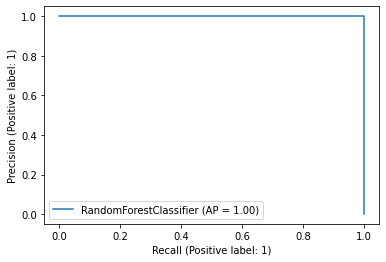

In [117]:
plot_precision_recall_curve(rf_w, X_train, y_train)


Prediction

In [118]:
y_pred = rf_w.predict(X_test)
y_train_pred = rf_w.predict(X_train)

rf_w_f1 = f1_score(y_test, y_pred)
rf_w_acc = accuracy_score(y_test, y_pred)
rf_w_recall = recall_score(y_test, y_pred)
rf_w_auc = roc_auc_score(y_test, y_pred)

In [119]:

rf_w_Pred = {"Actual": y_test, "RF_Pred": y_pred}
rf_w_Pred = pd.DataFrame.from_dict(rf_w_Pred)


In [120]:
rf_w_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, rf_w_Pred,
                       left_index=True, right_index=True)

In [121]:
Model_Preds.sample(5)

,Actual,Log_Pred,RF_Pred
15505,0,0,0
96099,0,0,0
175790,0,0,0
53490,0,0,0
202341,0,0,0


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [122]:
from deepchecks.tabular.suites import model_evaluation

train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
#suite_result = evaluation_suite.run(train_ds, test_ds, rf_w_tuned)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
#suite_result.show()


### XGBoost Classifier with Unbalanced Data Techniques

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

With class_weight='balanced'

In [123]:
xgb = XGBClassifier(class_weight='balanced', random_state=101)

In [124]:
xgb.fit(X_train,y_train)

XGBClassifier(class_weight='balanced', random_state=101)

In [125]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[56857     7]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.86      0.89        98

    accuracy                           1.00     56962
   macro avg       0.96      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227439     12]
 [    66    328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.83      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [126]:
kfold = StratifiedKFold(n_splits=3, random_state=101, shuffle=True)


In [127]:
model = XGBClassifier(class_weight='balanced', random_state=101)

scores = cross_validate(model, X_train, y_train,
                        scoring=scoring, cv=kfold, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 4))
df_scores.mean()[2:]


test_precision_fraud     0.918932
train_precision_fraud    0.970581
test_recall_fraud        0.776679
train_recall_fraud       0.837571
test_f1_fraud            0.841426
train_f1_fraud           0.899147
dtype: float64

GridSearchCV

In [128]:
xgb_grid = XGBClassifier(class_weight='balanced', random_state=101)


In [129]:
param_grid = {"n_estimators": [50, 100],
              'max_depth': [3, 5],
              "learning_rate": [0.1, 0.2],
              "subsample": [0.8, 1],
              "colsample_bytree": [0.8, 1]}


In [130]:
grid_xgb = GridSearchCV(estimator= xgb_grid,
                         param_grid=param_grid,
                         scoring=f1_fraud,
                         n_jobs=-1, verbose=2)


In [131]:
grid_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=XGBClassifier(class_weight='balanced', random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1]},
             scoring=make_scorer(f1_score, average=None, labels=1), verbose=2)

In [132]:
grid_xgb.best_params_


{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.8}

Tuned Model

In [133]:
xgb_tuned = XGBClassifier(class_weight='balanced', colsample_bytree=0.8, learning_rate=0.1,
                          max_depth=3, n_estimators=50, random_state=101,
                          subsample=0.8)

In [134]:
xgb_tuned.fit(X_train, y_train)


XGBClassifier(class_weight='balanced', colsample_bytree=0.8, n_estimators=50,
              random_state=101, subsample=0.8)

In [135]:
eval_metric(xgb_tuned, X_train, y_train, X_test, y_test)


Test_Set
[[56860     4]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227437     14]
 [    69    325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.82      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845



***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [136]:
from deepchecks.tabular.suites import model_evaluation

train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
#suite_result = evaluation_suite.run(train_ds, test_ds, xgb)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
#suite_result.show()


With weighted class_weights

In [137]:
xgb_w = XGBClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=101)

In [138]:
xgb_w.fit(X_train, y_train)

XGBClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=101)

In [139]:
eval_metric(xgb_w, X_train, y_train, X_test, y_test)

Test_Set
[[56857     7]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.86      0.89        98

    accuracy                           1.00     56962
   macro avg       0.96      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227439     12]
 [    66    328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.83      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [140]:
model = XGBClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=101)

scores = cross_validate(model, X_train, y_train,
                        scoring=scoring, cv=kfold, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 4))
df_scores.mean()[2:]


test_precision_fraud     0.918932
train_precision_fraud    0.970581
test_recall_fraud        0.776679
train_recall_fraud       0.837571
test_f1_fraud            0.841426
train_f1_fraud           0.899147
dtype: float64

In [141]:
xgb_grid_w = XGBClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=101)


In [142]:
param_grid = {"n_estimators": [50, 100],
              'max_depth': [3, 5],
              "learning_rate": [0.1, 0.2],
              "subsample": [0.8, 1],
              "colsample_bytree": [0.8, 1]}


In [143]:
grid_xgb_w = GridSearchCV(estimator= xgb_grid_w,
                         param_grid=param_grid,
                         scoring=f1_fraud,
                         n_jobs=-1, verbose=2)

In [144]:
grid_xgb_w.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=XGBClassifier(class_weight={0: 0.1, 1: 0.9},
                                     random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1]},
             scoring=make_scorer(f1_score, average=None, labels=1), verbose=2)

In [145]:
grid_xgb_w.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [146]:
xgb_w_tuned = XGBClassifier(class_weight={0: 0.1, 1: 0.9}, colsample_bytree=0.8, learning_rate=0.1,
                          max_depth=3, n_estimators=50, random_state=101,
                          subsample=0.8)

In [147]:
xgb_w_tuned.fit(X_train, y_train)

XGBClassifier(class_weight={0: 0.1, 1: 0.9}, colsample_bytree=0.8,
              n_estimators=50, random_state=101, subsample=0.8)

In [148]:
eval_metric(xgb_w_tuned, X_train, y_train, X_test, y_test)


Test_Set
[[56860     4]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227437     14]
 [    69    325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.82      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845



xgb_w

***iii. Plot Precision and Recall Curve***

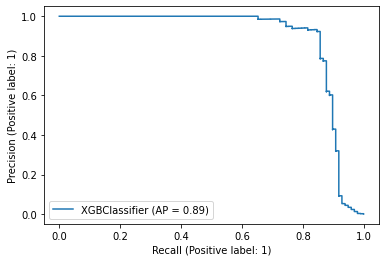

In [149]:
plot_precision_recall_curve(xgb_w, X_test, y_test)


Prediction

In [150]:
y_pred = xgb_w.predict(X_test)
y_train_pred = xgb_w.predict(X_train)

In [151]:
xgb_w_f1 = f1_score(y_test, y_pred)
xgb_w_acc = accuracy_score(y_test, y_pred)
xgb_w_recall = recall_score(y_test, y_pred)
xgb_w_auc = roc_auc_score(y_test, y_pred)

In [152]:
xgb_w_Pred = {"Actual": y_test, "xgb_w_Pred": y_pred}
xgb_w_Pred = pd.DataFrame.from_dict(xgb_w_Pred)

In [153]:
xgb_w_Pred.drop("Actual", axis=1, inplace=True)
Model_Preds = pd.merge(Model_Preds, xgb_w_Pred,
                       left_index=True, right_index=True)

In [154]:
Model_Preds.sample(5)

,Actual,Log_Pred,RF_Pred,xgb_w_Pred
2320,0,0,0,0
42736,0,0,0,0
29348,0,0,0,0
128395,0,0,0,0
244058,0,0,0,0


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [155]:
from deepchecks.tabular.suites import model_evaluation

train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
#suite_result = evaluation_suite.run(train_ds, test_ds, xgb_w)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
#suite_result.show()


### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [12]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
X = df1.drop('Class', axis=1)
y = df1['Class']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=101)


In [15]:
scaler = MinMaxScaler()

X_train["Amount"] = scaler.fit_transform(X_train["Amount"].values.reshape(-1,1))
X_train["Time"] = scaler.fit_transform(X_train["Time"].values.reshape(-1,1))

X_test["Amount"] = scaler.fit_transform(X_test["Amount"].values.reshape(-1,1))
X_test["Time"] = scaler.fit_transform(X_test["Time"].values.reshape(-1,1))

In [16]:
X_train.shape


(256326, 30)

In [162]:
X_train.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
78460,0.332996,-5.176481,0.126142,-0.152523,-4.543241,-1.691037,-1.331075,1.365159,-2.059954,4.067428,...,-0.561264,-0.446325,-0.343299,-0.085908,0.688114,0.604491,-1.250192,-0.58976,1.321104,0.005768


In [17]:
seed = 101


***ii. Define Model***

In [164]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(46, activation="relu", input_dim=X_train.shape[1]))
# 0,5 ne kadar oranla süzgec gecirecek nöronlari, bu katmanin random olarak %50 sini gecir %50 sini bloke et
#model.add(Dropout(0.25))

model.add(Dense(23, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(12, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(6, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


In [165]:
early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose=1, patience=10, restore_best_weights=True)


In [166]:
model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=32, epochs=1000, verbose=1,
          callbacks=[early_stop])


Epoch 1/1000
6409/6409 [==============================] - 11s 2ms/step - loss: 0.0080 - recall: 0.7114 - val_loss: 0.0038 - val_recall: 0.7957
Epoch 2/1000
6409/6409 [==============================] - 10s 2ms/step - loss: 0.0030 - recall: 0.7943 - val_loss: 0.0038 - val_recall: 0.8065
Epoch 3/1000
6409/6409 [==============================] - 10s 2ms/step - loss: 0.0027 - recall: 0.7971 - val_loss: 0.0034 - val_recall: 0.8172
Epoch 4/1000
6409/6409 [==============================] - 10s 2ms/step - loss: 0.0026 - recall: 0.7886 - val_loss: 0.0031 - val_recall: 0.7957
Epoch 5/1000
6409/6409 [==============================] - 10s 2ms/step - loss: 0.0024 - recall: 0.7943 - val_loss: 0.0029 - val_recall: 0.8387
Epoch 6/1000
6409/6409 [==============================] - 10s 2ms/step - loss: 0.0022 - recall: 0.8114 - val_loss: 0.0033 - val_recall: 0.8172
Epoch 7/1000
6409/6409 [==============================] - 10s 2ms/step - loss: 0.0022 - recall: 0.8086 - val_loss: 0.0032 - val_recall: 0.8065

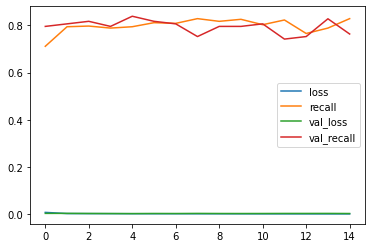

In [167]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();


In [168]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.0025306835304945707
recall :  0.8163265585899353


In [169]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


891/891 [==============================] - 1s 1ms/step
[[28424     8]
 [    9    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.82      0.82        49

    accuracy                           1.00     28481
   macro avg       0.92      0.91      0.91     28481
weighted avg       1.00      1.00      1.00     28481



***iii. Compile Model***

***iv. Fit Model***

In [170]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(46, activation="relu", input_dim=X_train.shape[1]))
# 0,5 ne kadar oranla süzgec gecirecek nöronlari, bu katmanin random olarak %50 sini gecir %50 sini bloke et
#model.add(Dropout(0.25))

model.add(Dense(23, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(12, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(6, activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


In [171]:
model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=32, epochs=1000, verbose=1,
          callbacks=[early_stop], class_weight={0: 0.1, 1: 0.9})


Epoch 1/1000
6409/6409 [==============================] - 11s 2ms/step - loss: 0.0027 - recall: 0.7829 - val_loss: 0.0041 - val_recall: 0.8065
Epoch 2/1000
6409/6409 [==============================] - 11s 2ms/step - loss: 0.0015 - recall: 0.8257 - val_loss: 0.0041 - val_recall: 0.8065
Epoch 3/1000
6409/6409 [==============================] - 11s 2ms/step - loss: 0.0014 - recall: 0.8429 - val_loss: 0.0071 - val_recall: 0.8387
Epoch 4/1000
6409/6409 [==============================] - 11s 2ms/step - loss: 0.0012 - recall: 0.8486 - val_loss: 0.0043 - val_recall: 0.8065
Epoch 5/1000
6409/6409 [==============================] - 11s 2ms/step - loss: 0.0012 - recall: 0.8514 - val_loss: 0.0054 - val_recall: 0.8280
Epoch 6/1000
6409/6409 [==============================] - 11s 2ms/step - loss: 0.0011 - recall: 0.8714 - val_loss: 0.0040 - val_recall: 0.8387
Epoch 7/1000
6409/6409 [==============================] - 11s 2ms/step - loss: 9.7320e-04 - recall: 0.8714 - val_loss: 0.0057 - val_recall: 0.

<AxesSubplot:>

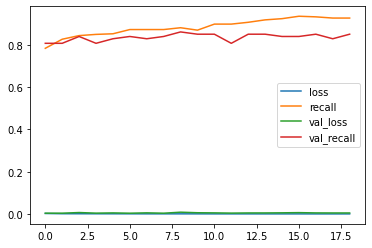

In [172]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


In [173]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)


loss :  0.008645078167319298
recall :  0.8979591727256775


***v. Prediction and Model Evaluating***

In [174]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


891/891 [==============================] - 1s 1ms/step
[[28362    70]
 [    5    44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.39      0.90      0.54        49

    accuracy                           1.00     28481
   macro avg       0.69      0.95      0.77     28481
weighted avg       1.00      1.00      1.00     28481



In [175]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=46, activation='relu'))
    classifier.add(Dense(units=23, activation='relu'))
    classifier.add(Dense(units=12, activation='relu'))
    classifier.add(Dense(units=6, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(
        optimizer="adam", loss='binary_crossentropy', metrics=["Recall"])
    return classifier


In [176]:
classifier_model = KerasClassifier(
    build_fn=build_classifier, batch_size=32, epochs=100, verbose=0, class_weight={0: 0.1, 1: 0.9})

scores = cross_validate(estimator=classifier_model, X=X_train, y=y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'], cv=5)

df_scores = pd.DataFrame(scores, index=range(1, 6)).iloc[:, 2:]

df_scores

1603/1603 [==============================] - 2s 1ms/step


,test_accuracy,test_precision,test_recall,test_f1
1,0.999005,0.644860,0.841463,0.730159
2,0.999044,0.716981,0.800000,0.756219
3,0.999161,0.823529,0.714286,0.765027
4,0.999083,0.634615,0.880000,0.737430
5,0.999181,0.747573,0.827957,0.785714


In [177]:
df_scores_summary = pd.DataFrame({"score_mean": df_scores.mean().values, "score_std": df_scores.std().values},
                                 index=["acc", "pre", "rec", "f1"])

df_scores_summary


,score_mean,score_std
acc,0.999095,0.000075
pre,0.713512,0.077804
rec,0.812741,0.062121
f1,0.754910,0.022199


GridSearchCV

In [18]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=4, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy', metrics=['accuracy'])
    return classifier


In [21]:
early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose=1, patience=5, restore_best_weights=True)


In [22]:
classifier_grid = KerasClassifier(build_fn=build_classifier, validation_split=0.1, epochs=200)


In [181]:
classifier_grid.get_params()

{'validation_split': 0.1,
 'epochs': 200,
 'build_fn': <function __main__.build_classifier(optimizer, learn_rate)>}

In [23]:
parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, Adadelta, Nadam],
              'learn_rate': [0.001, 0.005]}

grid_model = GridSearchCV(estimator=classifier_grid,
                          param_grid=parameters,
                          scoring='recall', n_jobs=-1,
                          cv=3,  # cross validation minimum 3 ideal 5
                          verbose=1, class_weight={0: 0.1, 1: 0.9})


In [24]:
grid_model.fit(X_train, y_train, callbacks=[early_stop])

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
grid_model.best_params_


In [ ]:
y_pred = grid_model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


***vi. Plot Precision and Recall Curve***

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


### Save and Export Variables

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___